In [1]:
!pip install pyLDAvis
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.5 MB/s eta 0:00:00


In [2]:
#Importações

import pandas as pd
import re
import numpy as np
from pprint import pprint
from tqdm import tqdm
import spacy
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS
import emoji

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#Leitura e pré-processamento dos dados

df = pd.read_csv('/content/m_transc_Patrick_Fernandes.csv')


documentos = df['Transcription'].dropna().tolist()


def remove_stopwords(texts):
    stop_words = stopwords.words('portuguese')
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


def preprocess(texts):
    documents = remove_stopwords(texts)
    return documents


data = preprocess(documentos)
print(data[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['acredita', 'volta', 'cristo', 'verdade', 'verdadeira', 'claro', 'católico', 'talvez', 'prega', 'trombetas', 'tocando', 'apocalipse', 'coisa', 'toda', 'aliás', 'acho', 'gente', 'vive', 'sinais', 'tempos', 'ausência', 'deus', 'humano', 'vivendo', 'sinais', 'tempos', 'destruição', 'sol', 'convertendo', 'lu', 'sangue', 'sei', 'quê', 'ausência', 'deus', 'vida', 'pessoas', 'gente', 'caminha', 'grande', 'precipício', 'pessoas', 'querem', 'saber', 'deus', 'agora', 'vimba', 'senhor', 'dará', 'maneira', 'especial', 'cada', 'dia', 'morte', 'todos', 'encontraremos', 'maneira', 'particular', 'vai', 'dia', 'senhor', 'dia', 'juízo', 'final', 'cada', 'dia', 'perto', 'desse', 'encontro', 'momento', 'morte']]


In [4]:
#Criação do dicionário a partir dos dados

dictionary = Dictionary(data)

corpus = [dictionary.doc2bow(doc) for doc in data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 14/14 [03:50<00:00, 16.47s/it]


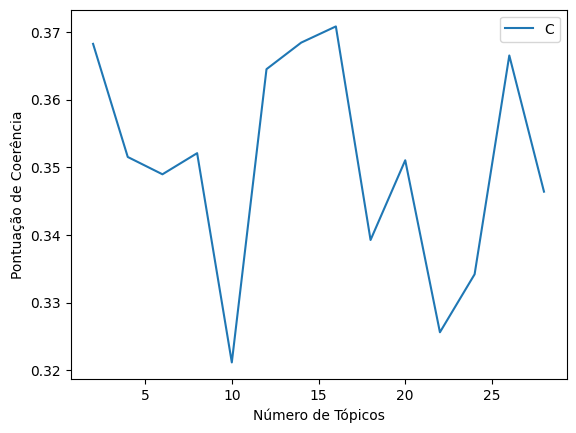

Número de tópicos = 2 tem uma pontuação de coerência de 0.3682
Número de tópicos = 4 tem uma pontuação de coerência de 0.3515
Número de tópicos = 6 tem uma pontuação de coerência de 0.349
Número de tópicos = 8 tem uma pontuação de coerência de 0.3521
Número de tópicos = 10 tem uma pontuação de coerência de 0.3212
Número de tópicos = 12 tem uma pontuação de coerência de 0.3645
Número de tópicos = 14 tem uma pontuação de coerência de 0.3684
Número de tópicos = 16 tem uma pontuação de coerência de 0.3708
Número de tópicos = 18 tem uma pontuação de coerência de 0.3393
Número de tópicos = 20 tem uma pontuação de coerência de 0.351
Número de tópicos = 22 tem uma pontuação de coerência de 0.3256
Número de tópicos = 24 tem uma pontuação de coerência de 0.3342
Número de tópicos = 26 tem uma pontuação de coerência de 0.3665
Número de tópicos = 28 tem uma pontuação de coerência de 0.3464


In [5]:
# Tópicos

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


limit = 30
start = 2
step = 2


model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data, start=start, limit=limit, step=step)


x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Número de Tópicos")
plt.ylabel("Pontuação de Coerência")
plt.legend(("Coerência"), loc='best')
plt.show()


for m, cv in zip(x, coherence_values):
    print(f"Número de tópicos = {m} tem uma pontuação de coerência de {round(cv, 4)}")


In [6]:
# Treinar o modelo LDA com a quantidade ótima de tópicos

optimal_num_topics = x[np.argmax(coherence_values)]
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=10, workers=2)


pprint(lda_model.print_topics())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.021*"senhor" + 0.018*"deus" + 0.016*"gente" + 0.011*"jesus" + '
  '0.007*"tudo" + 0.007*"assim" + 0.007*"parte" + 0.007*"aí" + 0.006*"fazendo" '
  '+ 0.006*"lá"'),
 (1,
  '0.024*"deus" + 0.019*"vida" + 0.019*"senhor" + 0.013*"todos" + '
  '0.010*"jesus" + 0.008*"cristo" + 0.007*"aqui" + 0.006*"pai" + 0.006*"luz" + '
  '0.005*"então"'),
 (2,
  '0.005*"vou" + 0.004*"padre" + 0.004*"dom" + 0.004*"dia" + 0.003*"todo" + '
  '0.002*"senhor" + 0.002*"gente" + 0.002*"vida" + 0.002*"vai" + '
  '0.002*"agora"'),
 (3,
  '0.024*"deus" + 0.021*"senhor" + 0.014*"jesus" + 0.009*"vida" + '
  '0.009*"cristo" + 0.009*"parte" + 0.008*"pai" + 0.007*"fazemos" + '
  '0.007*"gente" + 0.006*"vossa"'),
 (4,
  '0.008*"vida" + 0.006*"mata" + 0.006*"tirar" + 0.005*"porque" + 0.005*"amor" '
  '+ 0.005*"vezes" + 0.005*"olho" + 0.004*"pessoas" + 0.004*"existe" + '
  '0.003*"tantas"'),
 (5,
  '0.020*"senhor" + 0.019*"parte" + 0.018*"gente" + 0.017*"deus" + '
  '0.015*"vida" + 0.010*"fazendo" + 0.009*"santo"

In [7]:
# Perplexidade do modelo
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

# Coerência do modelo
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nPontuação de Coerência: ', coherence_lda)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexidade:  -7.596990007495462

Pontuação de Coerência:  0.33743304413092157


In [8]:
# Visualização

lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

pyLDAvis.enable_notebook()
pyLDAvis.display(lda_display)

pyLDAvis.save_html(lda_display, 'Patrick_Fernandes_lda_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Extração, armazenamento e exibição dos tópicos

num_palavras = 10
topicos = lda_model.print_topics(num_words=num_palavras)


topicos_list = []

for topico_id, topico in topicos:
    topico_dict = {"Tópico": topico_id}
    palavras_pesos = topico.split(" + ")

    for palavra_peso in palavras_pesos:
        peso, palavra = palavra_peso.split("*")
        palavra = palavra.strip('"')
        topico_dict[palavra] = float(peso)

    topicos_list.append(topico_dict)

df_topicos = pd.DataFrame(topicos_list).fillna(0)


df_topicos.to_csv("Patrick_Fernandes_topicos_lda.csv", index=False, encoding='utf-8')


print(df_topicos)

    Tópico  senhor   deus  gente  jesus   tudo  assim  parte     aí  fazendo  \
0        0   0.021  0.018  0.016  0.011  0.007  0.007  0.007  0.007    0.006   
1        1   0.019  0.024  0.000  0.010  0.000  0.000  0.000  0.000    0.000   
2        2   0.002  0.000  0.002  0.000  0.000  0.000  0.000  0.000    0.000   
3        3   0.021  0.024  0.007  0.014  0.000  0.000  0.009  0.000    0.000   
4        4   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000    0.000   
5        5   0.020  0.017  0.018  0.009  0.000  0.000  0.019  0.000    0.010   
6        6   0.007  0.004  0.004  0.004  0.000  0.000  0.000  0.000    0.000   
7        7   0.019  0.021  0.018  0.011  0.000  0.000  0.042  0.000    0.011   
8        8   0.016  0.014  0.052  0.000  0.000  0.000  0.000  0.000    0.055   
9        9   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000    0.000   
10      10   0.028  0.020  0.011  0.012  0.000  0.000  0.000  0.000    0.000   
11      11   0.015  0.018  0.000  0.027 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


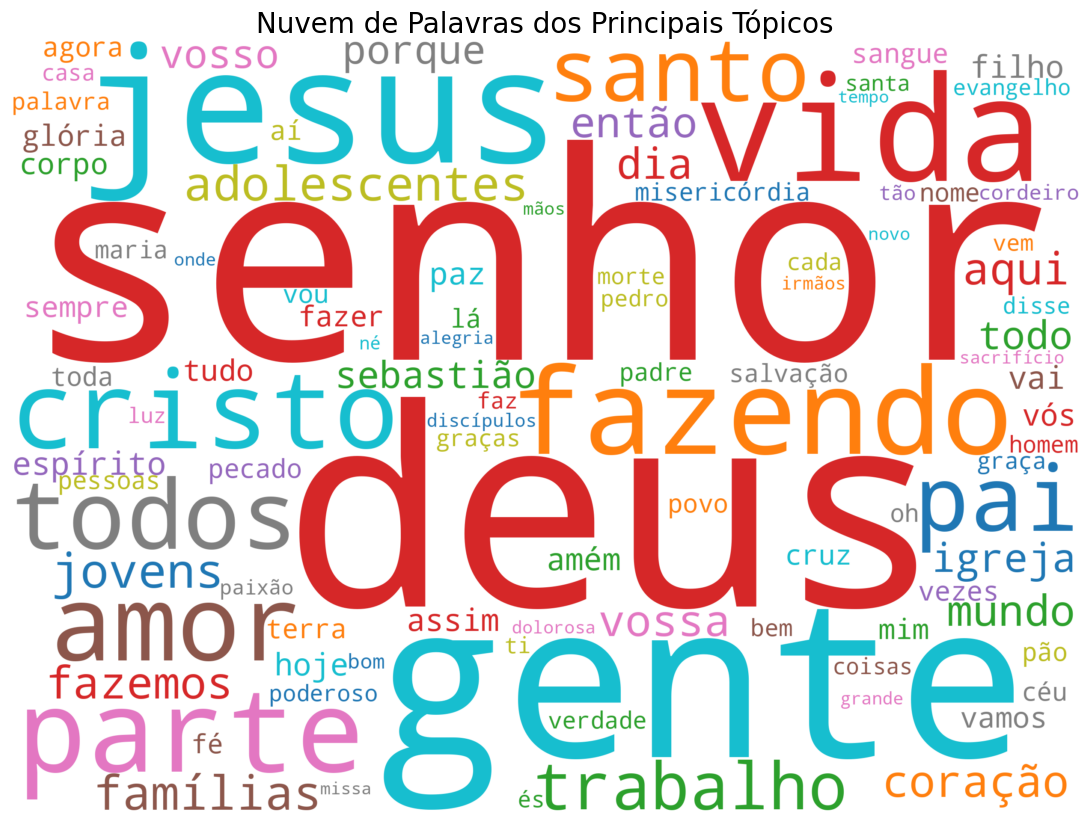

In [10]:
# Nuvem de Palavras
def plot_combined_word_cloud(lda_model, num_palavras=100):

    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]


    cloud = WordCloud(stopwords=stopwords.words('portuguese'),
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=num_palavras,
                      colormap='tab10',
                      prefer_horizontal=1.0)

    # Coletar palavras de todos os tópicos
    words = {}
    for i in range(lda_model.num_topics):
        for word, prob in lda_model.show_topic(i, num_palavras):
            if word in words:
                words[word] += prob
            else:
                words[word] = prob

    cloud.generate_from_frequencies(words)

    plt.figure(figsize=(15, 10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title('Nuvem de Palavras dos Principais Tópicos', fontsize=20)
    plt.axis('off')
    plt.show()


plot_combined_word_cloud(lda_model, num_palavras=100)